In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dark-patterns-on-ecommerce-platforms/dark_patterns.csv


In [3]:
df = pd.read_csv("/kaggle/input/dark-patterns-on-ecommerce-platforms/dark_patterns.csv")
df

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/
...,...,...,...,...,...,...,...
1813,$132.90 $99.00,Website adds free items to show discount,Misdirection,Visual Interference,Cart Page,No,https://www.planetofthevapes.com/products/plan...
1814,This offer is only VALID if you add to cart now!,Popup asking you to buy more,Misdirection,Visual Interference,Product Page,No,https://www.rockymountainoils.com/single-essen...
1815,NaN,Deterministic draw. Always give you the prize ...,Misdirection,Visual Interference,Product Page,Yes,https://www.sammydress.com/
1816,NaN,Shows you prices in the popup based on your cu...,Misdirection,Visual Interference,Product Page,No,https://www.shoedazzle.com/products/FEELIN-A-L...


<Axes: xlabel='Deceptive?', ylabel='count'>

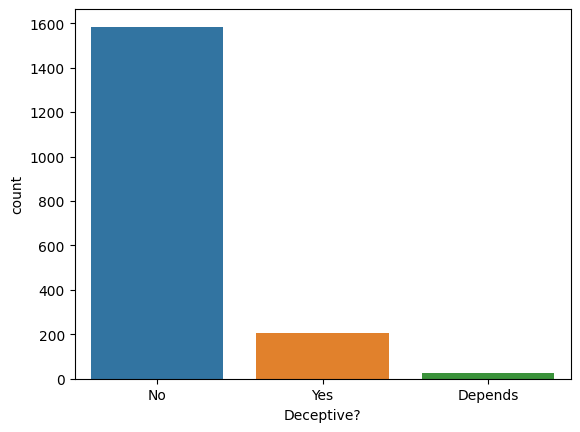

In [4]:
sns.countplot(x='Deceptive?', data = df)

<Axes: xlabel='Pattern Type', ylabel='count'>

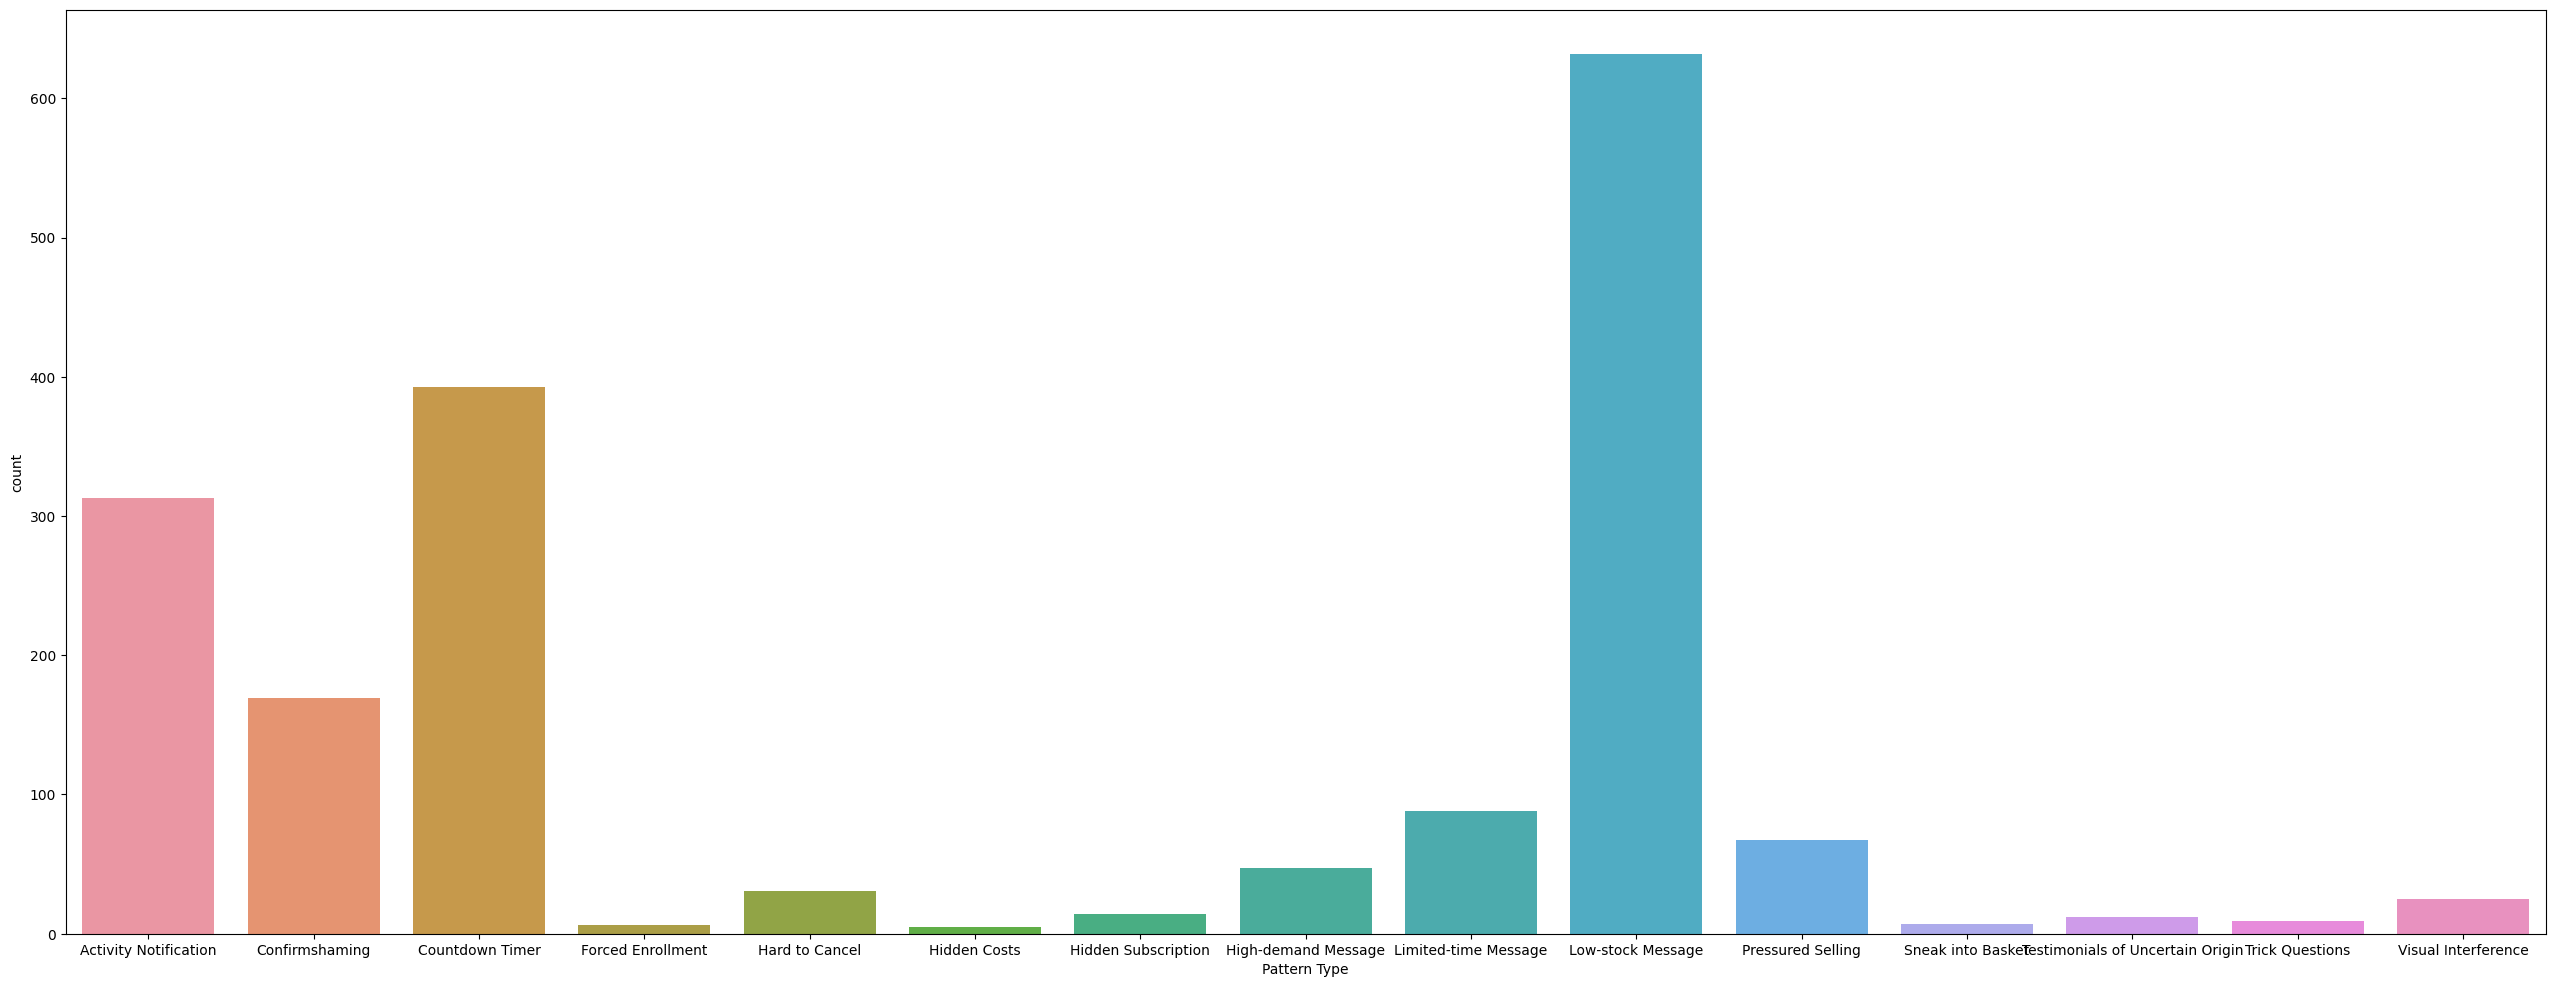

In [20]:
plt.figure(figsize=(32, 12))
sns.countplot(x='Pattern Type', data = df)

([<matplotlib.patches.Wedge at 0x7d92fe8aa800>,
 [Text(-1.0157210647620858, -0.4222685384901114, 'Low-stock Message'),
  Text(0.6160573996726044, -0.9113030672112484, 'Countdown Timer'),
  Text(1.0675089843443124, 0.26537627690540566, 'Activity Notification'),
  Text(0.5217815454378405, 0.9683718391405746, 'Confirmshaming'),
  Text(0.055101721965548967, 1.0986190423601947, 'Limited-time Message'),
  Text(-0.23761956520660413, 1.0740283712411998, 'Pressured Selling'),
  Text(-0.44323879789507026, 1.0067469235316953, 'High-demand Message'),
  Text(-0.5745052604448702, 0.9380531465333785, 'Hard to Cancel'),
  Text(-0.6624518388532555, 0.8781557727419097, 'Visual Interference'),
  Text(-0.7200855553992622, 0.8315508360318907, 'Hidden Subscription'),
  Text(-0.7567072837610844, 0.7983696428991535, 'Testimonials of Uncertain Origin'),
  Text(-0.7851747841236756, 0.7703898742690869, 'Trick Questions'),
  Text(-0.806172314313625, 0.7483890696918374, 'Sneak into Basket'),
  Text(-0.822779774279

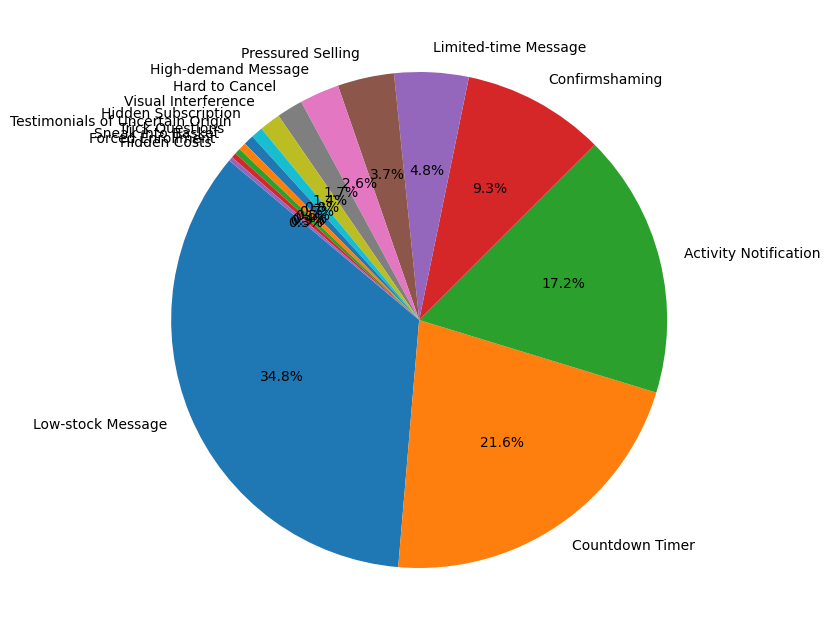

In [36]:
plt.figure(figsize=(8, 24))
plt.pie(df['Pattern Type'].value_counts(), labels = df['Pattern Type'].value_counts().index, autopct='%1.1f%%', startangle=140)

In [10]:
df['Pattern Type'].value_counts()

Pattern Type
Low-stock Message                   632
Countdown Timer                     393
Activity Notification               313
Confirmshaming                      169
Limited-time Message                 88
Pressured Selling                    67
High-demand Message                  47
Hard to Cancel                       31
Visual Interference                  25
Hidden Subscription                  14
Testimonials of Uncertain Origin     12
Trick Questions                       9
Sneak into Basket                     7
Forced Enrollment                     6
Hidden Costs                          5
Name: count, dtype: int64

<Axes: xlabel='Pattern Category', ylabel='count'>

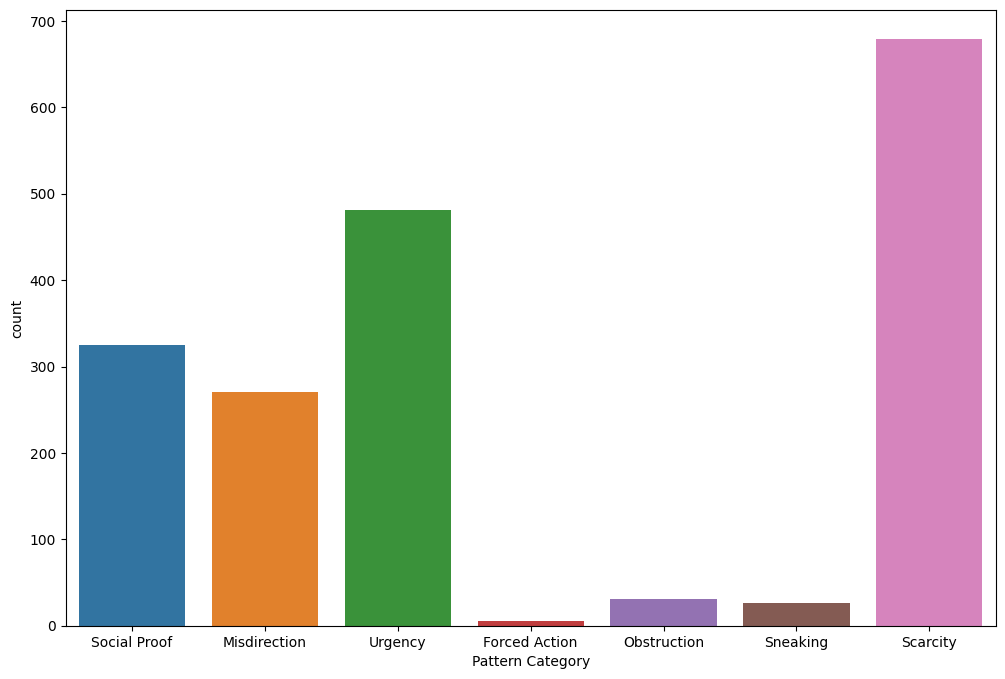

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Pattern Category', data = df)

([<matplotlib.patches.Wedge at 0x7d92fe391060>,
 [Text(0.4257764290534607, 1.0142556050929585, 'Scarcity'),
  Text(-1.0992757861249796, -0.03990922248438922, 'Urgency'),
  Text(-0.15534883157623527, -1.0889750871934119, 'Social Proof'),
  Text(0.8523428619674445, -0.6953500166485552, 'Misdirection'),
  Text(1.0852107565944416, -0.17977100370115337, 'Obstruction'),
  Text(1.0976292549002695, -0.07218045987023984, 'Sneaking'),
  Text(1.0999408755400721, -0.01140483740085613, 'Forced Action')],
 [Text(0.23224168857461489, 0.5532303300507047, '37.3%'),
  Text(-0.5996049742499887, -0.021768666809666843, '26.5%'),
  Text(-0.08473572631431013, -0.5939864111964064, '17.9%'),
  Text(0.4649142883458787, -0.37928182726284826, '14.9%'),
  Text(0.5919331399606044, -0.09805691110972002, '1.7%'),
  Text(0.5987068663092379, -0.03937115992922172, '1.4%'),
  Text(0.5999677502945847, -0.006220820400466979, '0.3%')])

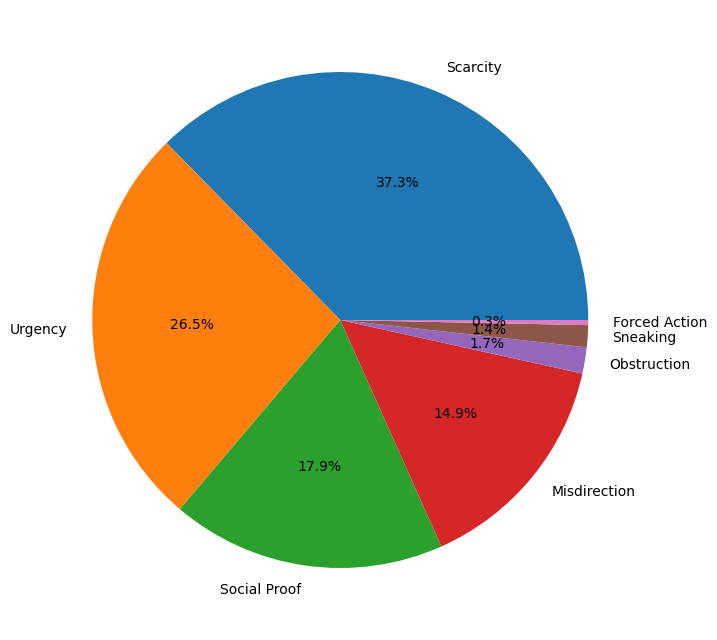

In [43]:
plt.figure(figsize=(8, 24))
plt.pie(df['Pattern Category'].value_counts(), labels = df['Pattern Category'].value_counts().index , autopct = "%1.1f%%")

<Axes: xlabel='Where in website?', ylabel='count'>

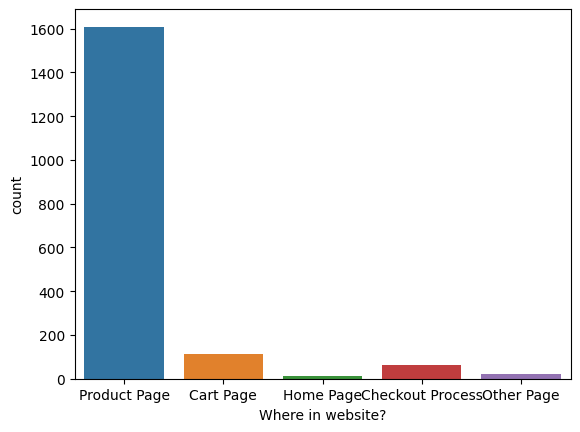

In [44]:
sns.countplot(x='Where in website?', data = df)